<a href="https://colab.research.google.com/github/mahernher/Affirmations/blob/master/practica4_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4 Parte III. Reducción de la dimensionalidad

Vamos a ver cómo funciona el algoritmo de PCA utilizado un dataset muy conocido en el mundo del aprendizaje automático: el dataset de los dígitos. 

El dataset de los dígitos está compuesto por 1797 imágenes de dígitos manuscritos de tamaño 8x8. Este dataset se utiliza normalmente para algoritmos de clasificación (que veremos más adelante), pero también es un buen ejemplo para ver los algoritmos de clustering y de reducción de dimensionalidad. 

Cada dígito viene representado por un vector de 64 componentes que corresponden a los valores de cada pixel del dígito. Para más información sobre este dataset ver: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html.

En esta parte de la práctica compararemos los resultados que se obtienen utilizando K-means y K-means combinado con PCA. Para ello empezamos cargando las librerías necesarias. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Fijamos la semilla para obtener siempre los mismos resultados.

In [2]:
np.random.seed(42)

Cargamos el dataset de los dígitos.

In [3]:
digits = load_digits()

Obtenemos los descriptores de las instancias y estandarizamos (veremos en qué consiste este proceso más adelante) el dataset.

In [4]:
data = scale(digits.data)

Mostramos el número de instancias del dataset y el número de descriptores.

In [5]:
n_instancias, n_descriptores = data.shape
print("n_instancias %d, n_descriptores %d" % (n_instancias, n_descriptores))

n_instancias 1797, n_descriptores 64


Construimos el estimador K-means. Tenemos 10 clusters ya que de antemano sabemos que hay 10 posibles dígitos y por lo tanto 10 posibles grupos.

In [6]:
estimator = KMeans(n_clusters=10)

Realizamos la agrupación por clusters y mostramos el tiempo necesario

In [7]:
%%time 
estimator.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 926 ms, sys: 571 ms, total: 1.5 s
Wall time: 811 ms


KMeans(n_clusters=10)

Ahora definimos una función que nos indica para cada clase la distribución en clusters. Notad que los clusters no están ordenados.

In [8]:
def valida_digits(etiquetas_esperadas, etiquetas_obtenidas):
    for i in range(0,10):
        res = np.zeros(10).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==i):
                res[etiquetas_obtenidas[j]]+=1
        print("Dígito " + str(i) + ": ")
        print(res)

Mostramos la distribución de los dígitos.

In [9]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[177   0   0   0   1   0   0   0   0   0]
Dígito 1: 
[ 0  0  0 96  1  0 27  0  0 58]
Dígito 2: 
[ 0  0  2 34  0  0 48  6 82  5]
Dígito 3: 
[  0   0   8   9   0   0   1 152  13   0]
Dígito 4: 
[  0   0   4   3 157   9   0   0   0   8]
Dígito 5: 
[ 0  2  2 59  2  0  0 72 43  2]
Dígito 6: 
[  1 175   0   4   0   0   0   0   0   1]
Dígito 7: 
[  0   0 150   0   0  18   0   0   8   3]
Dígito 8: 
[ 0  3  2 99  0  0  0 46  9 15]
Dígito 9: 
[  0   0   8   5   0   3   0 145   0  19]


Repetimos el proceso pero esta vez aplicando el algoritmo de PCA tomando 20 componentes principales

In [10]:
%%time 
pca = PCA(n_components=20).fit(data)
data_r = pca.transform(data)
estimator = KMeans(n_clusters=10)
estimator.fit(data_r)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 516 ms, sys: 374 ms, total: 890 ms
Wall time: 458 ms


KMeans(n_clusters=10)

In [11]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0 177   0   0   0   0   1   0   0]
Dígito 1: 
[58  0  0 96  0  0 27  0  0  1]
Dígito 2: 
[ 6 78  0 36  0  0 51  0  4  2]
Dígito 3: 
[  0  13   0   8   0   0   2   0 151   9]
Dígito 4: 
[  7   0   0   4   9   0   0 157   0   4]
Dígito 5: 
[ 2 42  0 61  0  3  0  2 70  2]
Dígito 6: 
[  1   0   1   4   0 172   3   0   0   0]
Dígito 7: 
[  3   8   0   0  17   0   0   1   0 150]
Dígito 8: 
[16  8  0 97  0  3  0  0 47  3]
Dígito 9: 
[ 19   0   0   4   3   0   3   0 142   9]


***
## Ejercicio 
Compara los resultados tanto en tiempo, como en distribución de los clusters utilizando PCA y sin utilizarlo.

***

Utilizando los siguientes comandos podemos ver el porcentaje de varianza explicado por cada una de las componentes de PCA y el total.

In [12]:
print(pca.explained_variance_ratio_)
print("Varianza total: " + str(100*np.sum(pca.explained_variance_ratio_))+ "%")

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.0338938  0.02998218 0.02931999 0.02781802 0.02577053
 0.0227529  0.02227158 0.02165106 0.01913676 0.01775422 0.01637672
 0.01596214 0.01488264]
Varianza total: 79.31140439157596%


La siguiente función nos genera un gráfico mostrando la varianza acumulada y la varianza individual que se obtiene al considerar distintos valores como componentes principales (en concreto va tomando valores entre 1 y el número de descriptores). Además esta función muestra la varianza total para cada caso.

In [13]:
def drawVarianza(data):
    pcas = [PCA(n_components=k).fit(data) for k in range(1,len(data[0]))]
    var = [pca.explained_variance_ratio_[-1] for pca in pcas]
    varianzas = [np.sum(pca.explained_variance_ratio_) for pca in pcas]
    for k in range(1,len(data[0])):
        print("Varianza total (%s componentes): %s" % (k,str(100 * varianzas[k-1])))
    plt.clf()

    plt.step(range(1,len(data[0])),varianzas,where='mid',label='varianza acumulada')
    plt.bar(range(1,len(data[0])),var,alpha=0.5,align='center',label='varianza individual')
    plt.xlabel('Componentes principales')
    plt.ylabel('Ratio de varianza explicada')
    plt.show()

Varianza total (1 componentes): 12.033916091922457
Varianza total (2 componentes): 21.594970490811374
Varianza total (3 componentes): 30.039385378258626
Varianza total (4 componentes): 36.53779329659494
Varianza total (5 componentes): 41.39794638256272
Varianza total (6 componentes): 45.61206387139443
Varianza total (7 componentes): 49.55012056853006
Varianza total (8 componentes): 52.935237982426855
Varianza total (9 componentes): 55.937414536015005
Varianza total (10 componentes): 58.86822840704477
Varianza total (11 componentes): 61.65028096714473
Varianza total (12 componentes): 64.22949923200643
Varianza total (13 componentes): 66.50366748079092
Varianza total (14 componentes): 68.7320358023145
Varianza total (15 componentes): 70.89797722269915
Varianza total (16 componentes): 72.81194124406419
Varianza total (17 componentes): 74.58017686237474
Varianza total (18 componentes): 76.2250044301832
Varianza total (19 componentes): 77.82100658040785
Varianza total (20 componentes): 79.3

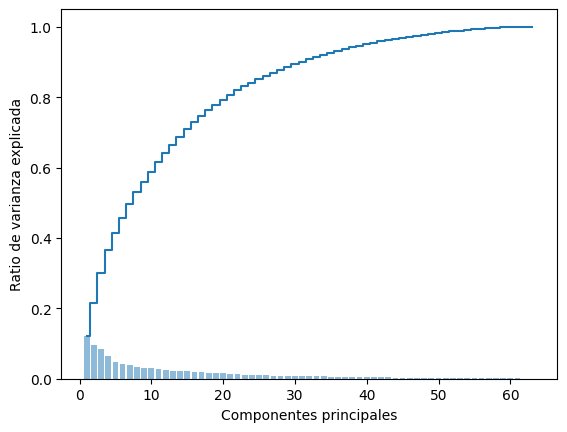

In [14]:
drawVarianza(data)

*** 
## Ejercicio
En clase hemos visto que para elegir el número de componentes k, debemos tomar el menor k tal que la varianza total sea mayor que el 99%. En nuestro caso, ¿qué valor deberíamos tomar?

El menor k que cumple esos requisitos es k=54 .

***

## Ejercicio adicional
Recupera los ficheros de la práctica 3 y repite el análisis hecho para el dataset de los dígitos, pero esta vez utilizando el dataset iris.csv.


In [15]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv -O iris.csv

--2023-03-31 10:12:50--  https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2023-03-31 10:12:50 (45.1 MB/s) - ‘iris.csv’ saved [4606/4606]



In [26]:
import pandas as pd
df=pd.read_csv('iris.csv')

In [27]:
XIris=df.iloc[:,:-1]

In [28]:
def valida_iris(etiquetas_esperadas, etiquetas_obtenidas):
    for i in ['Iris-setosa','Iris-versicolor','Iris-virginica']:
        res = np.zeros(3).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==i):
                res[etiquetas_obtenidas[j]]+=1
        print(i+": ")
        print(res)

In [29]:
estimator = KMeans(n_clusters=3)
estimator.fit(XIris)
estimator.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [30]:
valida_iris(df.iloc[:,:-1],estimator.labels_)

Iris-setosa: 
[0 0 0]
Iris-versicolor: 
[0 0 0]
Iris-virginica: 
[0 0 0]


In [32]:
pca = PCA(n_components=4).fit(XIris)
data_r = pca.transform(XIris)
estimator = KMeans(n_clusters=3)
estimator.fit(data_r)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [33]:
print(pca.explained_variance_ratio_)
print("Varianza total: " + str(100*np.sum(pca.explained_variance_ratio_))+ "%")

[0.92461621 0.05301557 0.01718514 0.00518309]
Varianza total: 100.00000000000003%


Varianza total (1 componentes): 92.46162071742684
Varianza total (2 componentes): 97.76317750248035
Varianza total (3 componentes): 99.48169145498102


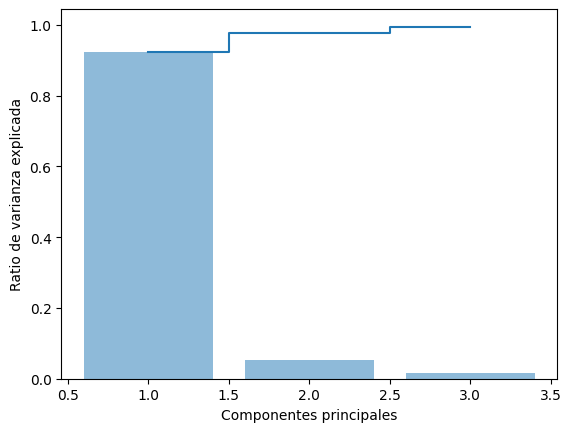

In [34]:
drawVarianza(XIris.values)

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.